# Homework 2: Linear Models for Regression and Classification

Due 10/21 at 11:59pm

In this notebook, we will be implementing three linear models: linear regression, logistic regression, and SVM. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

**Note: There are two notebooks in Homework 2. Please also complete the other notebook `HW2_Decision_Trees.ipynb` for full credit on this assignment.**

![comic](https://pbs.twimg.com/media/ESlslPWWkAAcNP-?format=jpg&name=900x900)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC


Bad key "text.kerning_factor" on line 4 in
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Part 1: Linear Regression

### 1.1 Data Exploration

In part 1, we will use two datasets to train and evaluate our linear regression model. 

The first dataset will be a synthetic dataset sampled from the following equations:

$$
\epsilon \sim \text{Normal}(0, 3) \\
y = 3x + 10 + \epsilon
$$

In [2]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)   # Sample epsilon from a Normal distribution
x = np.linspace(0, 10, 100)             # Sample x evenly between 0 and 100
y = 3 * x + 10 + epsilon

Note that the above dataset satisfies all the assumptions of a linear regression model:
- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0.**

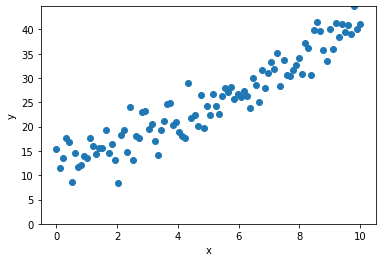

In [3]:
### Your code here
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([0,max(y)]);

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [47]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']
# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

display(auto_mpg_df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**Plot the distribution of the label (mpg) using a histogram.**

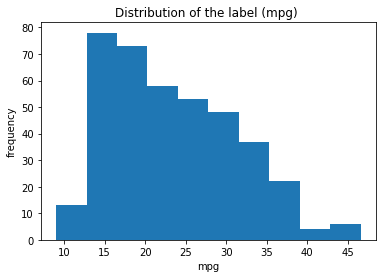

In [6]:
### Your code here
plt.hist(auto_mpg_y)
plt.xlabel("mpg")
plt.ylabel("frequency")
plt.title("Distribution of the label (mpg) ");

**Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.**

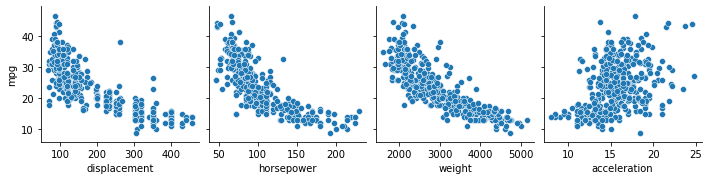

In [7]:
### Your code here
import seaborn as sns
sns.pairplot(auto_mpg_df, y_vars=['mpg'],x_vars = ['displacement', 'horsepower', 'weight', 'acceleration']);


**Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.**

C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\_

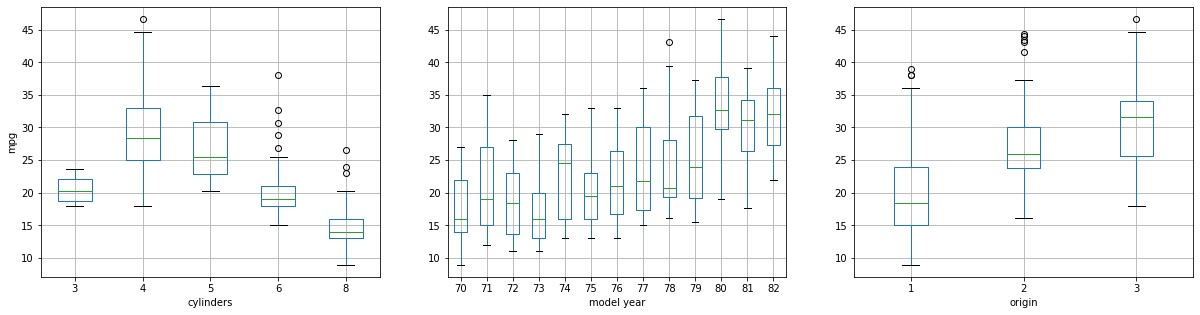

In [8]:
### Your code here
fig,ax = plt.subplots(1,3,figsize = (20,5))
auto_mpg_df.boxplot(column = ['mpg'],by = 'cylinders',ax = ax[0]);
fig.suptitle("Relationships between the label (mpg) and the discrete features")
ax[0].set_ylabel('mpg')
ax[0].set_title('')
auto_mpg_df.boxplot(column = ['mpg'],by = 'model year',ax = ax[1]);
fig.suptitle("")
ax[1].set_title('')
auto_mpg_df.boxplot(column = ['mpg'],by = 'origin',ax = ax[2]);
fig.suptitle("")
ax[2].set_title('');

**From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

In [9]:
### Your answer here

'''
I think linear regression is good for this problem, because three of the continuous features show linear relationships with the label (mpg), and the discrete features also show linear relationship. Through regression, it's likely to get the approximate solution of the lable.
'''

"\nI think linear regression is good for this problem, because three of the continuous features show linear relationships with the label (mpg), \nand the discrete features also show linear relationship. Through regression, it's likely to get the approximate solution of the lable.\n"

### 1.2 Data Pre-processing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

In [10]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [25.10940496 14.74320191 20.52842695 21.80437679 31.0649271 ]


In [11]:
# Verify that columns (other than the ones column) have 0 mean, 1 variance
print(X_train.mean(axis=0), X_train.std(axis=0))
print(X_val.mean(axis=0), X_val.std(axis=0))
print(X_test.mean(axis=0), X_test.std(axis=0))

[ 1.00000000e+00 -4.81096644e-17] [0. 1.]
[ 1.        -0.1263445] [0.         1.03471221]
[ 1.         -0.15508637] [0.         1.13264481]


**Now, apply the same processing steps on the auto MPG dataset.**

In [12]:
### Your code here
# 1. Categorical features
origin = pd.get_dummies(auto_mpg_X['origin'])
origin.columns = ['origin1','origin2','origin3']
auto_mpg_X_ohe = pd.concat([auto_mpg_X,origin],axis = 1)
auto_mpg_X_ohe = auto_mpg_X_ohe.drop(['origin'],axis = 1)
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X_ohe, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)
# 3. Standardize the columns in the feature matrices
   # Fit and transform scalar on X_train
scaler_feature = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year']
scaler = StandardScaler()
auto_mpg_X_train[scaler_feature] = scaler.fit_transform(auto_mpg_X_train[scaler_feature])
auto_mpg_X_val[scaler_feature] = scaler.transform(auto_mpg_X_val[scaler_feature])           # Transform X_val
auto_mpg_X_test[scaler_feature] = scaler.transform(auto_mpg_X_test[scaler_feature])         # Transform X_test

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])



[[ 1.          0.37998163  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817  1.          0.          0.        ]
 [ 1.         -0.83804168 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.          1.          0.        ]
 [ 1.          1.59800495  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755  1.          0.          0.        ]
 [ 1.         -0.83804168 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745  1.          0.          0.        ]
 [ 1.         -0.83804168 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.          1.          0.        ]] 

 135    18.0
197    29.0
89     15.0
338    27.2
325    44.3
Name: mpg, dtype: float64


C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying 

In [13]:
print(auto_mpg_X_train.mean(axis=0), auto_mpg_X_train.std(axis=0))
print(auto_mpg_X_val.mean(axis=0), auto_mpg_X_val.std(axis=0))
print(auto_mpg_X_test.mean(axis=0), auto_mpg_X_test.std(axis=0))

[ 1.00000000e+00 -2.50511862e-16 -1.13869028e-16 -4.55476113e-17
 -3.79563427e-17 -3.75767793e-16  8.25550454e-17  5.85470085e-01
  1.88034188e-01  2.26495726e-01] [0.         1.         1.         1.         1.         1.
 1.         0.49264071 0.39073947 0.41856351]
[ 1.          0.17183841  0.27104735  0.32570572  0.19416708 -0.22266949
 -0.03503536  0.73417722  0.11392405  0.15189873] [0.         1.09581865 1.14229547 1.20793657 1.04860281 0.99264291
 1.00447788 0.44177034 0.317719   0.35892271]
[ 1.          0.11787535  0.15011633  0.14644307  0.08099538 -0.09029904
 -0.13213843  0.63291139  0.18987342  0.17721519] [0.         1.07329774 1.11421337 1.14404897 1.06582643 0.95550901
 1.02815711 0.48201096 0.39220085 0.38185071]


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### 1.3 Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**Implement a `LinearRegression` class with two methods: `train` and `predict`.** You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [14]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        I = np.identity(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + self.alpha *  I, X.T @ y)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.w
        return y_pred

### 1.4 Train,  Evaluate, and Interpret Linear Regression Model

**Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 5 predictions on X_test, along with the actual labels in y_test.**

In [15]:
### Your code here
model = LinearRegression()
model.train(X_train, y_train)
print(pd.DataFrame({"actual label":y_test[:5],"predict label":model.predict(X_test)[:5]}))

   actual label  predict label
0     18.016063      18.044320
1     39.596945      35.639813
2     13.542275      11.006123
3     27.951662      26.548808
4     30.672842      32.413972


**Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** If your line goes through the data points, you have likely implemented the linear regression correctly!

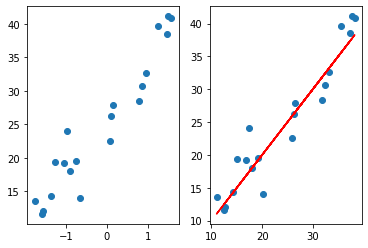

In [16]:
### Your code here
fig,ax = plt.subplots(1,2)
ax[0].scatter(X_test[:,1],y_test);
ax[1].scatter(X_test@model.w,y_test );
ax[1].plot(X_test@model.w, X_test@model.w,color = "r")

**Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [17]:
### Your code here
model = LinearRegression()
model.train(auto_mpg_X_train,auto_mpg_y_train)
y_val_pred = model.predict(auto_mpg_X_val)
y_test_pred = model.predict(auto_mpg_X_test)
MSE_train = np.mean((auto_mpg_y_train-auto_mpg_X_train @ model.w)**2)
MSE_val = np.mean((auto_mpg_y_val-y_val_pred)**2)
MSE_test = np.mean((auto_mpg_y_test-y_test_pred)**2)
print(f"MSE_train: {MSE_train}")
print(f"MSE_val: {MSE_val}")
print(f"MSE_test: {MSE_test}")
print(pd.DataFrame({"actual label":auto_mpg_y_test[:5],"predict label":y_test_pred[:5]}))

MSE_train: 10.368811026946721
MSE_val: 13.195009151405335
MSE_test: 10.654132877536153
     actual label  predict label
146          28.0      25.700634
282          22.3      24.993555
69           12.0      10.052118
378          38.0      32.471716
331          33.8      33.003772


**As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline.** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [18]:
### Your code here
mean_pre = np.mean(auto_mpg_y_train)
MSE_base_train = np.mean((auto_mpg_y_train-mean_pre)**2)
MSE_base_val = np.mean((auto_mpg_y_val-mean_pre)**2)
MSE_base_test = np.mean((auto_mpg_y_test-mean_pre)**2)
print(f"MSE_train using baseline: {MSE_base_train}")
print(f"MSE_val using baseline: {MSE_base_val}")
print(f"MSE_test using baseline: {MSE_base_test}")

MSE_train using baseline: 60.56461465410184
MSE_val using baseline: 60.47988929483249
MSE_test using baseline: 62.4616051879408


**Interpret your model trained on the auto MPG dataset using a bar chart of the model weights.** Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference.

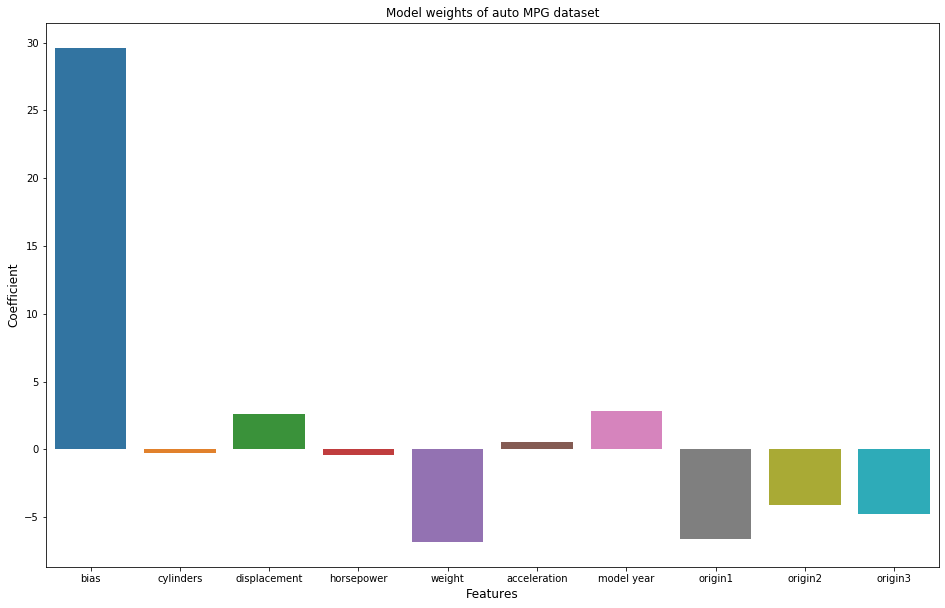

In [19]:
### Your code here
feature = ["bias"] + list(auto_mpg_X_ohe.columns)
plt.subplots(1,1,figsize = (16,10))
ax = sns.barplot(x = feature,y = model.w);
ax.set_xlabel("Features", fontsize = 12)
ax.set_ylabel("Coefficient", fontsize = 12)
ax.set_title("Model weights of auto MPG dataset", fontsize = 12);

**According to your model, which features are the greatest contributors to the MPG?**

In [20]:
### Your answer here

'''
According to the model, "bias" has the greatest contributor to the MPG, "weight", "orign1", "orign2", and "orign3" also contribute a lot. "displacement" and "model year" have a few contributors to the MPG, while the rest's contributions are s .
'''

'\nAccording to the model, "bias" has the greatest contributor to the MPG, "weight", "orign1", "orign2", and "orign3" also contribute a lot.\n"displacement" and "model year" have a few contributors to the MPG, while the rest\'s contributions are s .\n'

### 1.5 Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

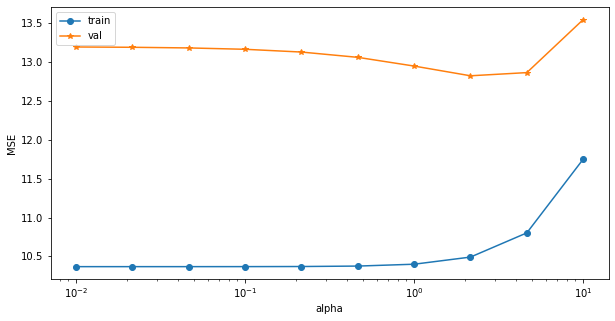

In [21]:
### Your code here
alphas = np.logspace(-2, 1, 10)
MSE_train = []
MSE_val = []
for a in alphas:
    model = LinearRegression(alpha = a)
    model.train(auto_mpg_X_train,auto_mpg_y_train)
    y_val_pred = model.predict(auto_mpg_X_val)
    MSE_train.append(np.mean((auto_mpg_y_train-auto_mpg_X_train @ model.w)**2))
    MSE_val.append(np.mean((auto_mpg_y_val-y_val_pred)**2))
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(alphas, MSE_train,'-o',label = 'train')
ax.plot(alphas, MSE_val,'-*',label = 'val')
ax.set_xscale('log')    
ax.set_ylabel("MSE")
ax.set_xlabel("alpha")
ax.legend();

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

In [22]:
### Your answer here

'''
As alpha increasing, the training MSE becomes higher while validation MSE first decreases and then increases. When alpha smaller than 1, the training MSE almost stays unchanged and validation MSE decreases. When alpha bigger than 1, the training MSE increases fast and validation MSE first decreases then increases.
'''

'\nAs alpha increasing, the training MSE becomes higher while validation MSE first decreases and then increases. When alpha smaller than 1, the training MSE almost stays unchanged and validation MSE decreases. When alpha bigger than 1, the training MSE increases fast and validation MSE first decreases then increases.\n'

**Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE.** This is the final tuned model which you would deploy in production.

In [23]:
### Your code here
a = alphas[np.argmin(MSE_val)]
print(f"alpha = {a}")
model = LinearRegression(alpha = a)
model.train(auto_mpg_X_train,auto_mpg_y_train)
y_val_pred = model.predict(auto_mpg_X_val)
y_test_pred = model.predict(auto_mpg_X_test)
MSE_train = np.mean((auto_mpg_y_train-auto_mpg_X_train @ model.w)**2)
MSE_val = np.mean((auto_mpg_y_val-y_val_pred)**2)
MSE_test = np.mean((auto_mpg_y_test-y_test_pred)**2)
print(f"MSE_train: {MSE_train}")
print(f"MSE_val: {MSE_val}")
print(f"MSE_test: {MSE_test}")

alpha = 2.154434690031882
MSE_train: 10.491757422157871
MSE_val: 12.821487635938695
MSE_test: 10.945035982798304


## Part 2: Logistic Regression

### 2.1 Data Exploration

<img src="https://pathology.jhu.edu/build/assets/breast/_image1200/368/ILC.jpg" alt="cells" width="400"/>

In parts 2 and 3, we will be using a [breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) for classification. Given 30 continuous features describing the nuclei of cells in a digitized image of a [fine needle aspirate (FNA)](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html) of a breast mass, we will train logistic regression and SVM models to classify each sample as benign (B) or malignant (M).

In [3]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
display(cancer_df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Split data into features and labels
cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**Compute the distribution of the labels. What is the probability of observing the majority class?** This is a common baseline for accuracy in classification problems.

In [5]:
### Your code here
print(cancer_y.value_counts())
print(f"The probability of observing the majority class: {np.max(cancer_y.value_counts())/len(cancer_y)*100:0.4f}%")

B    357
M    212
Name: diagnosis, dtype: int64
The probability of observing the majority class: 62.7417%


**Plot the relationships between the label (diagnosis) and the 30 features using a small multiple of box plots. Make sure to label the axes.**

NameError: name 'sns' is not defined

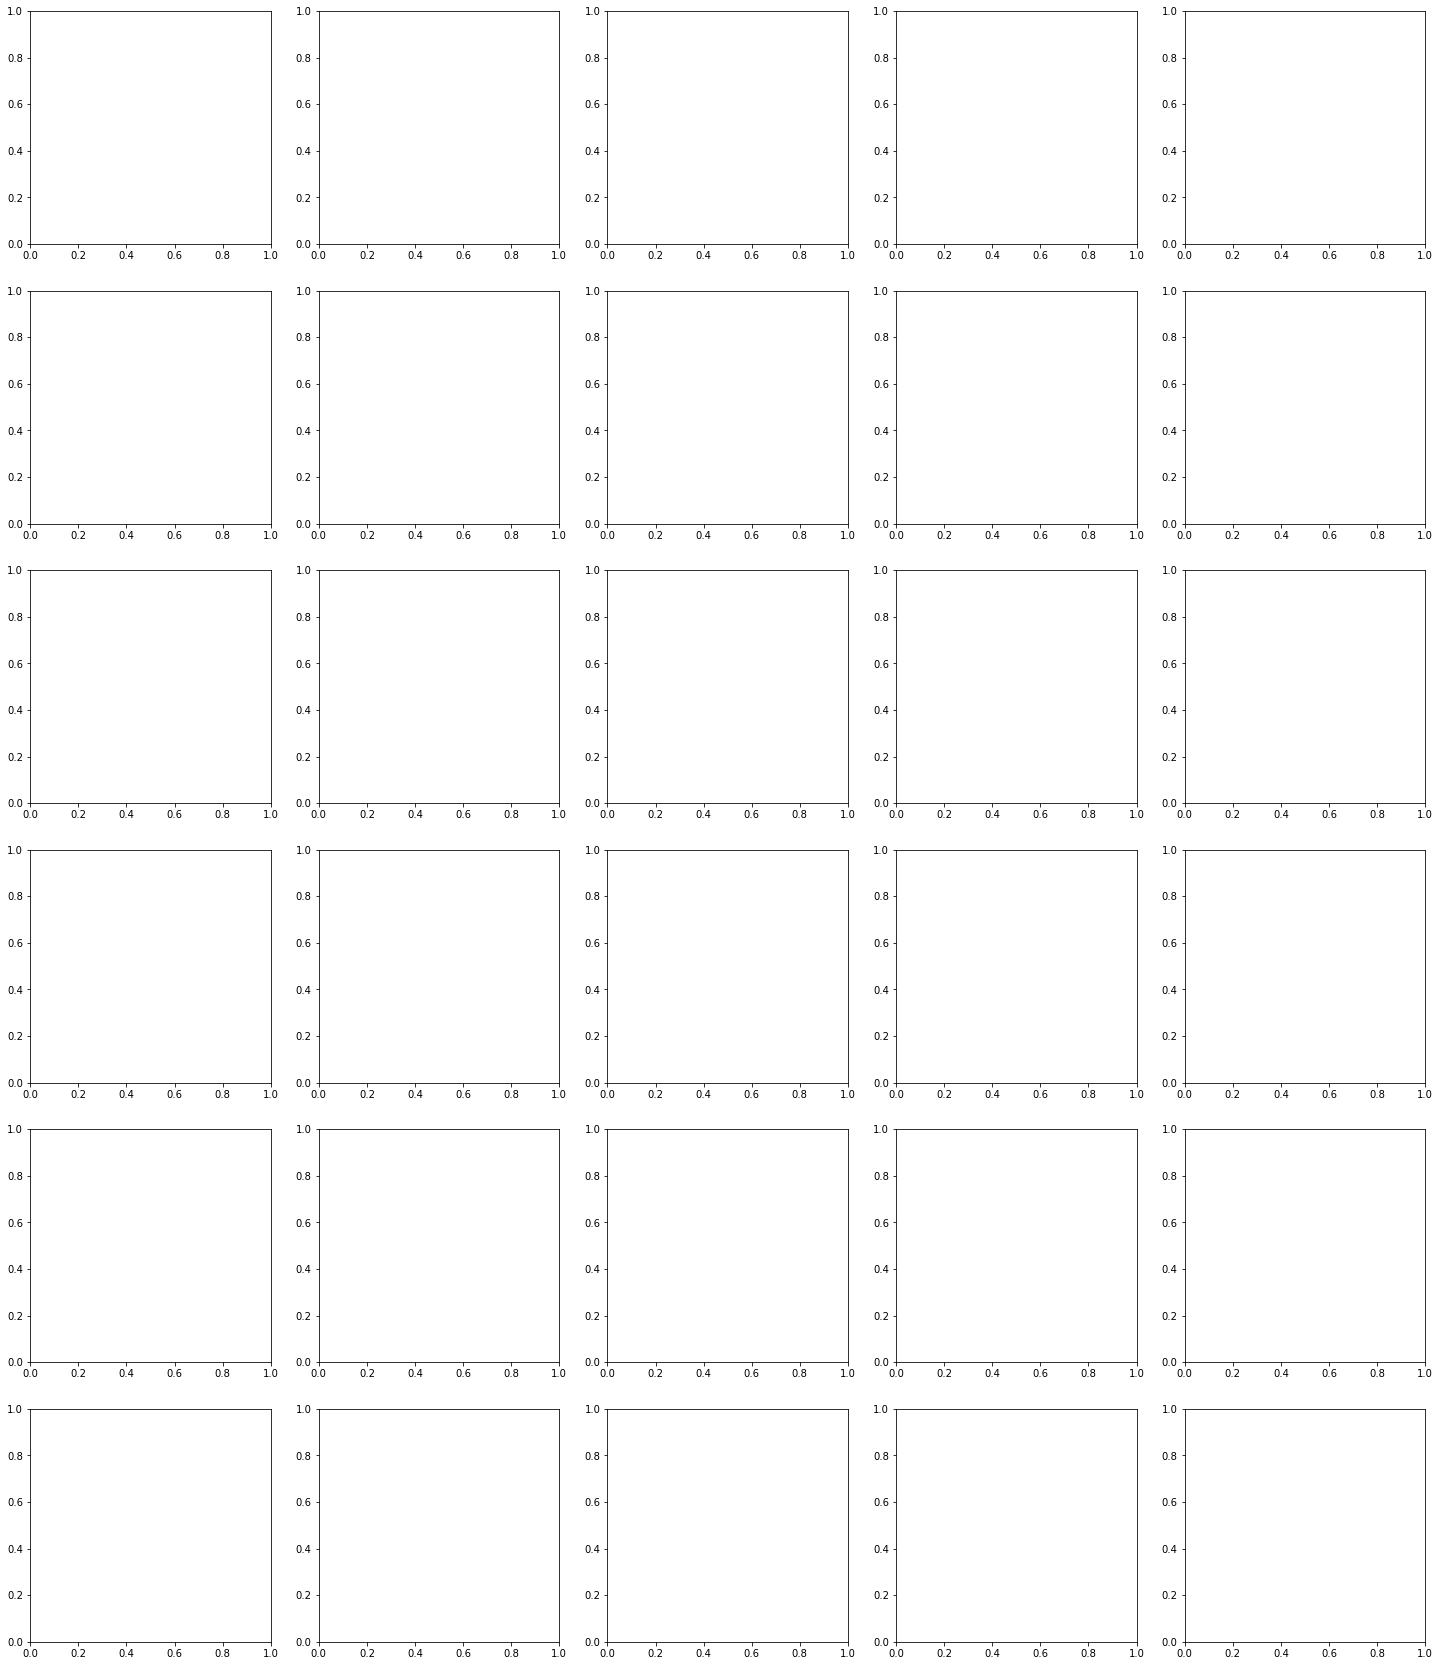

In [6]:
### Your code here
fig, ax = plt.subplots(6,5,figsize = (25,30))
j = 0
for i in cancer_X.columns:
    sns.boxplot(x = 'diagnosis',y = i, data = cancer_df, ax = ax[j//5,j%5])
    j = j+1


### 2.2 Data Pre-processing

**Apply the following pre-processing steps to the breast cancer dataset:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [7]:
### Your code here
# Encode the categorical label as 0 (B) or 1 (M).
cancer_y[cancer_y=="B"]=0
cancer_y[cancer_y=="M"]=1
# Convert the label from a Pandas series to a Numpy (m x 1) vector
cancer_y = cancer_y.to_numpy()

C:\Users\HP\AppData\Local\Temp/ipykernel_19076/2265986040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_y[cancer_y=="B"]=0
C:\Users\HP\AppData\Local\Temp/ipykernel_19076/2265986040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_y[cancer_y=="M"]=1


In [8]:
# Standardize the columns in the feature matrices
cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X,cancer_y,test_size = 0.2)
cancer_X_train,cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X,cancer_y,test_size = 0.25)
scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train)
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)
print(cancer_X_train.mean(axis=0), cancer_X_train.std(axis=0))
print(cancer_X_val.mean(axis=0), cancer_X_val.std(axis=0))
print(cancer_X_test.mean(axis=0), cancer_X_test.std(axis=0))

[-3.66946953e-16 -7.21384350e-16 -4.67023394e-16 -1.87643328e-16
  5.27486245e-16  1.20925700e-16 -8.33970347e-18 -7.50573312e-17
 -3.94050989e-16 -1.75133773e-16 -2.25171994e-16 -2.91889621e-16
  3.33588139e-17 -9.17367382e-17 -1.16755849e-16 -2.50191104e-17
 -1.66794069e-16  4.16985174e-18 -4.92042505e-16 -3.33588139e-17
 -8.33970347e-18 -1.29265404e-16  2.29341845e-16 -7.50573312e-17
 -5.30613633e-16  1.33435256e-16  1.04246293e-17 -2.91889621e-17
  2.04322735e-16  1.03829308e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[-0.18912857 -0.07618936 -0.17980131 -0.20700841  0.04577894  0.02682565
 -0.03540395 -0.09474718 -0.02870155  0.14640799 -0.24705638 -0.2092877
 -0.22635193 -0.22452946  0.08489626  0.01804963 -0.01063804 -0.10378317
 -0.00436511  0.0266946  -0.17569364 -0.07907409 -0.16288868 -0.19349288
  0.20023078  0.13407765  0.07143613 -0.02134296  0.09834142  0.22566265] [0.8100478  0.9924451  0.81522661 0.7491846  1.013656

In [9]:
# Add a column of ones to the feature matrices
cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])

At the end of this pre-processing, you should have the following vectors and matrices: cancer_X_train, cancer_X_val, cancer_X_test, cancer_y_train, cancer_y_val, cancer_y_test.

### 2.3 Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**Implement a `LogisticRegression` class with five methods: `train`, `predict`, `calculate_loss`, `calculate_gradient`, and `calculate_sigmoid`.** You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.

In [31]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        losses = []
        m,n = X.shape
        self.w = np.zeros(n)
        for i in range(self.t):          
            self.w = self.w - self.eta*self.calculate_gradient(X,y)
            losses.append(self.calculate_loss(X,y))
        return losses
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        y_pred = []
        sig = self.calculate_sigmoid(X @ self.w)
        for s in sig:
            if s > 0.6:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        
        sig = self.calculate_sigmoid(X @ self.w)
        loss = -y @ np.log(sig) - (np.ones(len(y))-y).T @ np.log(1-sig) + self.alpha * (self.w.T @ self.w)
        
        return loss
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        sig = self.calculate_sigmoid(X @ self.w)
        gradient = X.T @ (sig-y) + 2*self.alpha*self.w
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        x = x.astype('float')
        sigmoid_x = 1 / (1 + np.exp(-x))
        return sigmoid_x

### 2.4 Train, Evaluate, and Interpret Logistic Regression Model

**Using your implementation above, train a logistic regression model (alpha=0, t=100, eta=1e-3) on the breast cancer training data. Plot the training loss over epochs. Make sure to label your axes.** You should see the loss decreasing and start to converge.

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/3021367793.py:79: RuntimeWarning: divide by zero encountered in log
  loss = -y @ np.log(sig) - (np.ones(len(y))-y).T @ np.log(1-sig) + self.alpha * (self.w.T @ self.w)
C:\Users\HP\AppData\Local\Temp/ipykernel_15296/3021367793.py:79: RuntimeWarning: invalid value encountered in matmul
  loss = -y @ np.log(sig) - (np.ones(len(y))-y).T @ np.log(1-sig) + self.alpha * (self.w.T @ self.w)


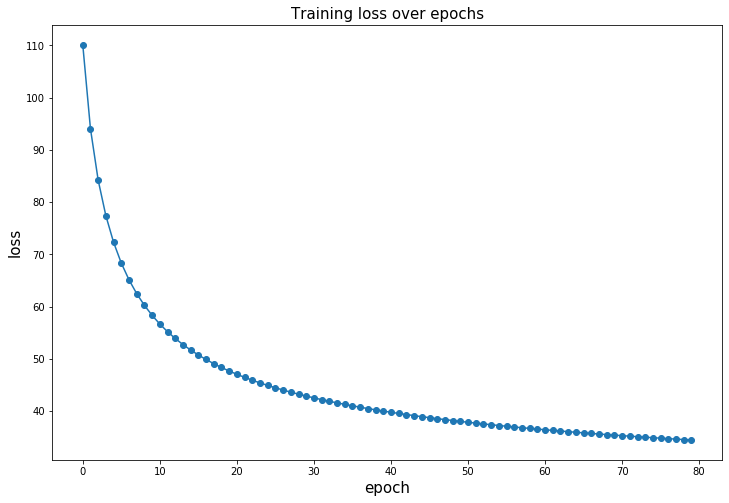

In [32]:
### Your code here
model = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = model.train(cancer_X_train,cancer_y_train)
fig, ax = plt.subplots(1,1,figsize = (12,8))
ax.plot(losses, '-o')
ax.set_title("Training loss over epochs",fontsize = 15)
ax.set_xlabel("epoch",fontsize = 15)
ax.set_ylabel("loss",fontsize = 15);

**Use your trained model to make predictions and report the accuracy on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.** Your accuracies should be much higher than the baseline accuracy we found in Section 2.1.

In [33]:
### Your code here
y_train = model.predict(cancer_X_train)
y_pred_test = model.predict(cancer_X_test)
y_pred_val = model.predict(cancer_X_val)
acc_test = np.sum(np.abs(cancer_y_test==y_pred_test))/len(y_pred_test)*100
acc_val = np.sum(np.abs(cancer_y_val==y_pred_val))/len(y_pred_val)*100
acc_train = np.sum(np.abs(cancer_y_train==y_train))/len(y_train)*100
print(f"Accuracy_train: {acc_train:0.4f}%")
print(f"Accuracy_val: {acc_val:0.4f}%")
print(f"Accuracy_test: {acc_test:0.4f}%")

Accuracy_train: 97.4178%
Accuracy_val: 99.3007%
Accuracy_test: 98.2456%


**Interpret your trained model using a bar chart of the model weights.** Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference.

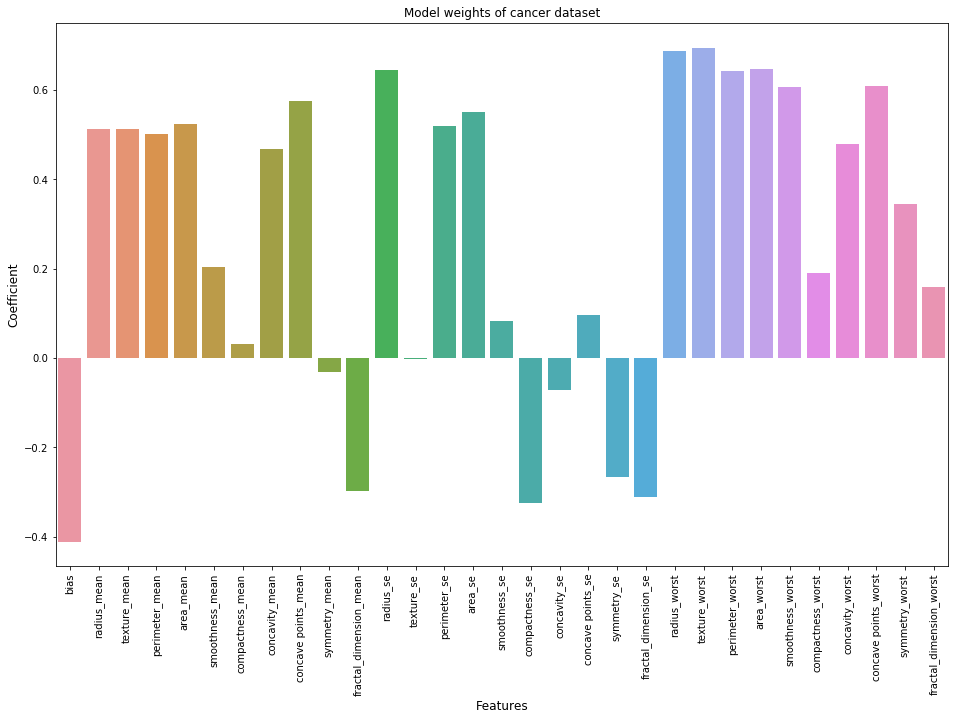

In [34]:
### Your code here
feature = ["bias"] + list(cancer_X.columns)
plt.subplots(1,1,figsize = (16,10))
ax = sns.barplot(x = feature,y = model.w);
ax.tick_params(axis = 'x', rotation = 90)
ax.set_xlabel("Features", fontsize = 12)
ax.set_ylabel("Coefficient", fontsize = 12)
ax.set_title("Model weights of cancer dataset", fontsize = 12);


In [35]:
print(feature)

['bias', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


**According to your model, which features are the greatest contributors to the diagnosis?**

In [36]:
### Your answer here

'''
According to my model, "radius_worst", "bias","area_worst", "perimeter_worst", "texture_worst"，and "radius_se" are the greatest contributors.
'''


'\nAccording to my model, "radius_worst", "bias","area_worst", "perimeter_worst", "texture_worst"，and "radius_se" are the greatest contributors.\n'

### 2.5 Tune Regularization Parameter  𝛼

Now, we will observe the effect of tuning the regularization parameter $\alpha$ on the learned weights of the model.

**Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 2, 100)`. For each $\alpha$ value, train a logistic regression model and record its weights. Plot the weights for each feature as a function of $\alpha$ on a single figure. Make sure to label the axes.** You should have 31 curves (one for each feature) in the plot.

In [37]:
### Your code here
alphas = np.logspace(-2, 2, 100)
weights = []
for a in alphas:
    model = LogisticRegression(alpha = a)
    model.train(cancer_X_train,cancer_y_train)
    weights.append(model.w)




C:\Users\HP\AppData\Local\Temp/ipykernel_15296/3021367793.py:79: RuntimeWarning: divide by zero encountered in log
  loss = -y @ np.log(sig) - (np.ones(len(y))-y).T @ np.log(1-sig) + self.alpha * (self.w.T @ self.w)
C:\Users\HP\AppData\Local\Temp/ipykernel_15296/3021367793.py:79: RuntimeWarning: invalid value encountered in matmul
  loss = -y @ np.log(sig) - (np.ones(len(y))-y).T @ np.log(1-sig) + self.alpha * (self.w.T @ self.w)


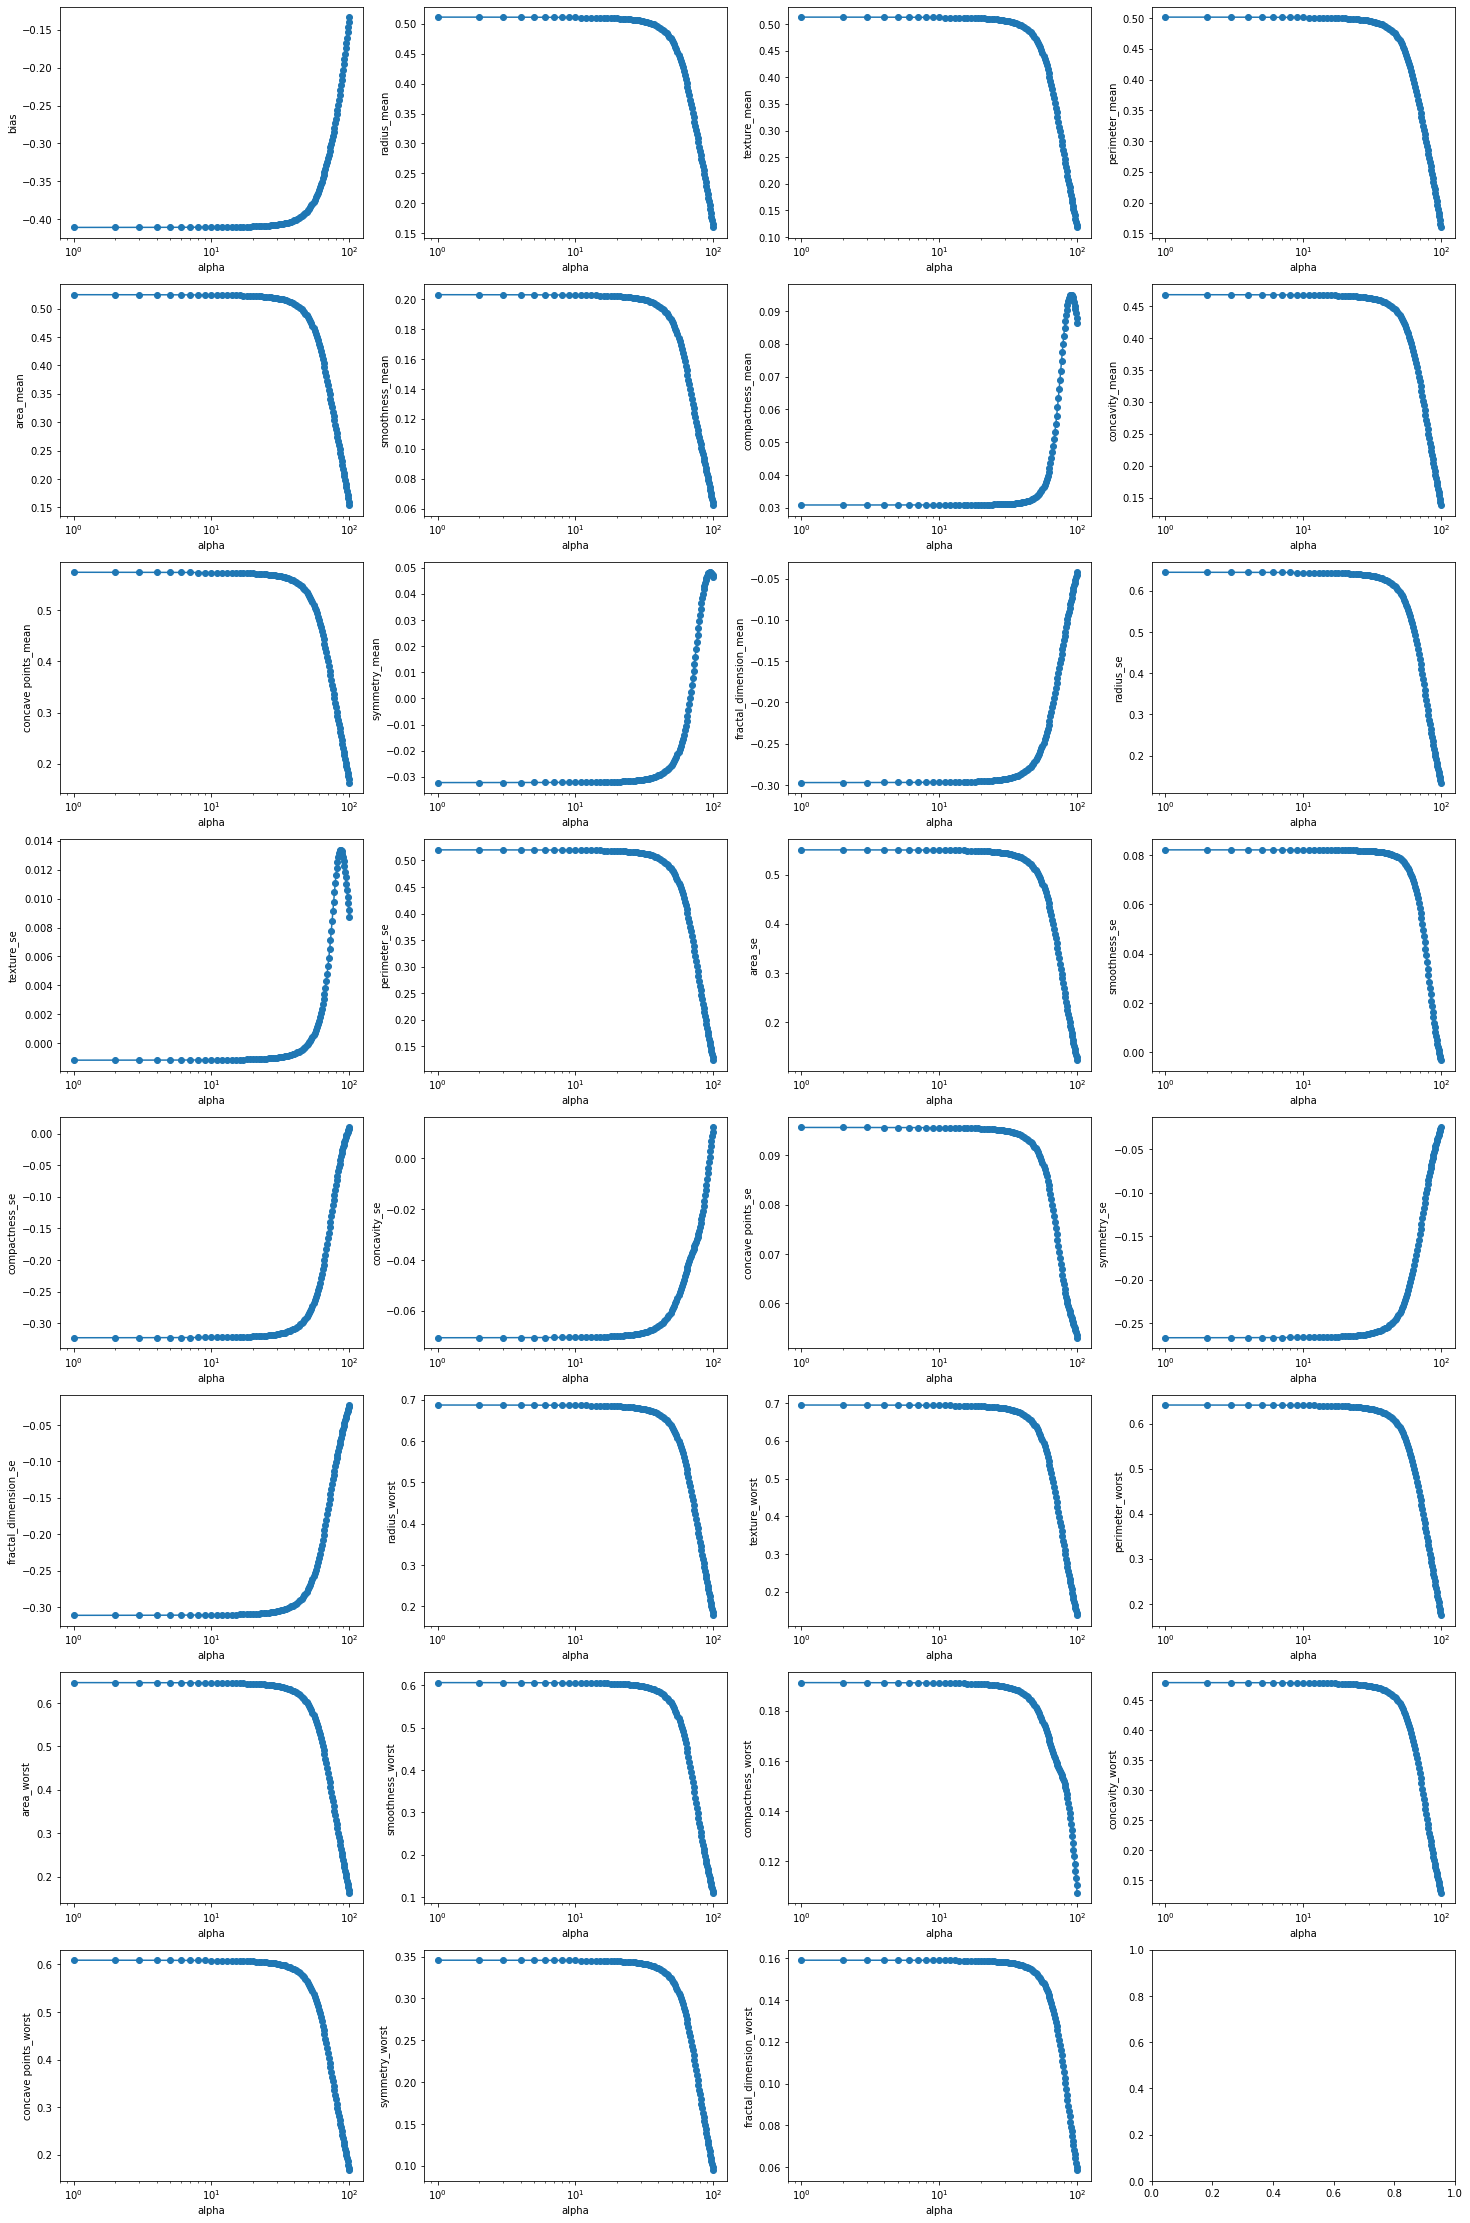

In [38]:
fig,ax = plt.subplots(8,4,figsize = (25,40))
i = 0
for row in np.asarray(weights).T:
    ax[i//4,i%4].plot(np.arange(1,101),row,"-o")
    ax[i//4,i%4].set_ylabel(feature[i])
    ax[i//4,i%4].set_xlabel("alpha")
    ax[i//4,i%4].set_xscale('log')   
    i+=1

**Describe the effect of the regularization parameter $\alpha$ on the weights of your model. Please explain in terms of model complexity.**

In [39]:
### Your answer here

'''
As alpha increases, the absolute value of the weights becomes closer to zero. Since the larger alpha is, the less complex the model will be. Therefore, the weights of several less important feature will decrease to zero to reduce the complexity, while other weights also get closer to 0.
'''

'\nAs alpha increases, the absolute value of the weights becomes closer to zero. Since the larger alpha is, the less complex the model will be. Therefore, the weights of several less important feature will decrease to zero to reduce the complexity, while other weights also get closer to 0.\n'

## Part 3: SVM

You are allowed to use sklearn or any ML library in this part.

### 3.1 Train Primal SVM

**Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.**

In [40]:
### Your code here
model = LinearSVC()
svm_pri = model.fit(cancer_X_train, cancer_y_train.astype('int'))
print(f"Accuracy_train: {model.score(cancer_X_train,cancer_y_train.astype('int')):0.4f}")
print(f"Accuracy_val: {model.score(cancer_X_val,cancer_y_val.astype('int')):0.4f}")
print(f"Accuracy_test: {model.score(cancer_X_test,cancer_y_test.astype('int')):0.4f}")

Accuracy_train: 0.9883
Accuracy_val: 0.9790
Accuracy_test: 0.9737


### 3.2 Train Dual SVM

**Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.**

In [12]:
### Your code here
from sklearn.svm import SVC
model = SVC(kernel = "linear")
svm = model.fit(cancer_X_train, cancer_y_train.astype('int'))
print(f"Accuracy_train: {model.score(cancer_X_train,cancer_y_train.astype('int')):0.4f}")
print(f"Accuracy_val: {model.score(cancer_X_val,cancer_y_val.astype('int')):0.4f}")
print(f"Accuracy_test: {model.score(cancer_X_test,cancer_y_test.astype('int')):0.4f}")

Accuracy_train: 0.9859
Accuracy_val: 0.9720
Accuracy_test: 0.9912


### 3.3 Number of Support Vectors

**Find the number of support vectors in your SVM model.**

In [42]:
### Your code here
print(f"The number of support vectors is {len(svm.support_vectors_)}.")

The number of support vectors is 39.


### 3.4 Hyperparameter Tuning

**Improve the SVM model (by hyperparameter tuning, feature selection, or using a non-linear SVM) to get better test performance than the dual SVM.**

In [13]:
### Your code here
# hyperparameter tuning seems to be useless
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(GridSearchCV(SVC(),param_grid = [{'kernel':['linear','rbf','poly','sigmoid'],\
                                                       'C': np.logspace(-2, 2, 100),'gamma':np.logspace(-3, 1, 10)}]))
pipe.fit(cancer_X_train, cancer_y_train.astype('int'))
grid = pipe.named_steps['gridsearchcv']
print(f"Best parameter: {grid.best_params_}")
print(f"Best test score: {pipe.score(cancer_X_test,cancer_y_test.astype('int')):0.4f}")

KeyboardInterrupt: 

In [15]:
### Your code here
# hyperparameter tuning seems to be useless
from sklearn.metrics import recall_score,precision_score,f1_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(GridSearchCV(SVC(),scoring = make_scorer(f1_score), param_grid = [{'kernel':['linear','rbf','poly','sigmoid'],\
                                                       'C': np.logspace(-2, 2, 100),'gamma':np.logspace(-3, 1, 10)}]))
pipe.fit(cancer_X_train, cancer_y_train.astype('int'))
grid = pipe.named_steps['gridsearchcv']
print(f"Best parameter: {grid.best_params_}")
print(f"Best test score: {pipe.score(cancer_X_test,cancer_y_test.astype('int')):0.4f}")

Best parameter: {'C': 4.229242874389499, 'gamma': 0.007742636826811269, 'kernel': 'rbf'}
Best test score: 0.9877


In [44]:
# feature selection seems to be useless
model = SVC(kernel = 'linear')
model.fit(cancer_X_train, cancer_y_train.astype('int'))
drop_col = [i for i in range(len(model.coef_[0])) if np.abs(model.coef_[0][i])<0.1]
cancer_X_train_sel = pd.DataFrame(cancer_X_train).drop(columns = drop_col, axis = 1)
cancer_X_val_sel = pd.DataFrame(cancer_X_val).drop(columns = drop_col, axis = 1)
cancer_X_test_sel = pd.DataFrame(cancer_X_test).drop(columns = drop_col, axis = 1)
model = SVC(kernel = 'linear')
model.fit(cancer_X_train_sel, cancer_y_train.astype('int'))
model.score(cancer_X_test_sel,cancer_y_test.astype('int'))

0.9736842105263158

In [45]:
# use model with the tuned hyperparameter on the selected feature can improve the performance!
C = grid.best_params_["C"]
gamma = grid.best_params_['gamma']
kernel = grid.best_params_['kernel']
model = SVC(C = C,gamma = gamma,kernel = kernel)
model.fit(cancer_X_train_sel, cancer_y_train.astype('int'))
print(f"Best test score: {model.score(cancer_X_test_sel,cancer_y_test.astype('int'))}")

Best test score: 0.9824561403508771
